In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [3]:
img = cv2.imread('surprised man.jpg')

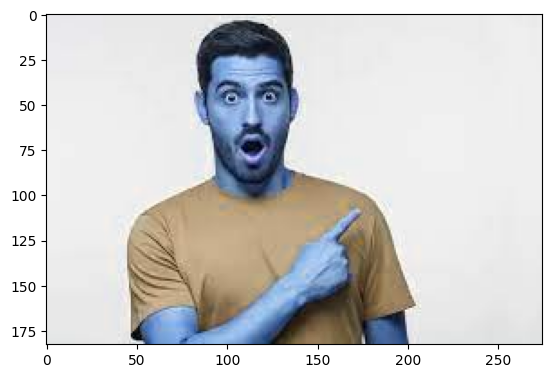

In [4]:
plt.imshow(img)

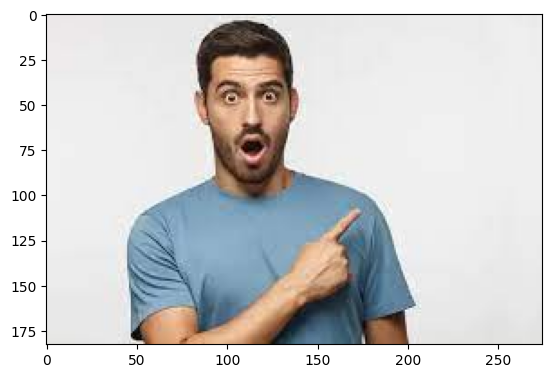

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
predictions = DeepFace.analyze(img)

Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.20s/it]


In [6]:
predictions

[{'emotion': {'angry': 4.5199213261071236e-07,
   'disgust': 5.6918516124285223e-11,
   'fear': 0.0015305980923585594,
   'happy': 4.4620829253716465e-08,
   'sad': 5.93973763403366e-11,
   'surprise': 99.99847412109375,
   'neutral': 6.8674014331967e-18},
  'dominant_emotion': 'surprise',
  'region': {'x': 81, 'y': 20, 'w': 66, 'h': 66},
  'age': 31,
  'gender': {'Woman': 0.0010844384632946458, 'Man': 99.99891519546509},
  'dominant_gender': 'Man',
  'race': {'asian': 0.39000220127416857,
   'indian': 4.239906995886981,
   'black': 0.29347065722767457,
   'white': 42.7546198817861,
   'middle eastern': 31.89635168888281,
   'latino hispanic': 20.42564722452445},
  'dominant_race': 'white'}]

In [15]:
predictions[0]['dominant_emotion']

'surprise'

In [16]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [18]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)

In [19]:
for x,y,w,h in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255, 0, 0), 2)

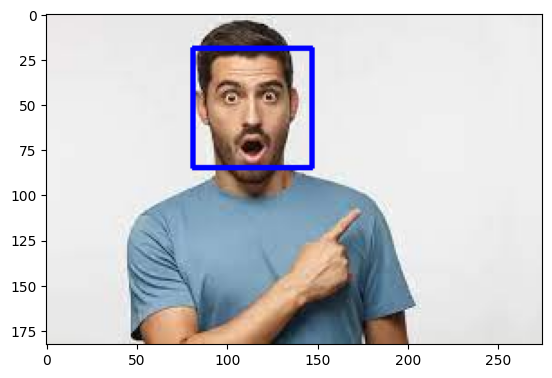

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

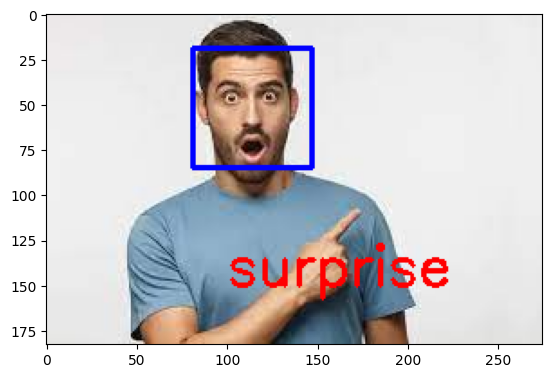

In [22]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, predictions[0]['dominant_emotion'], (100, 150), font, 1, (0,0,255), 2, cv2.LINE_4)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#Live Demo

In [12]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=["emotion"])
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255, 0, 0), 2)
        
    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame, result[0]['dominant_emotion'], (50, 50), font, 1, (0,0,255), 2, cv2.LINE_4)

    cv2.imshow('Live Camera', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Action: emotion: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.79it/s]


ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.